<a href="https://colab.research.google.com/github/pratyush2911/High-RiskTaxPayer-Detection/blob/main/HIgh_Taxpayers_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import keras
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import pickle

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/data/Dataset/Dataset/tax_data.csv')

df.head()

,STATEFIPS,STATE,zipcode,agi_stub,returns,single_return,joint_return,househeld_retrn,exemptions,AGI,...,retrn_with_taxabl_security,taxabl_security_amnt,expenses_amount,health_insurance,return_with_IRS_paymnt,IRS_payment_amnt,incm_tax_amnt,tax_liability,tax_due_filling)amnt,ovr_payment
0,1,AL,35000.0,1,350.0,960.0,240.0,NaN,4560.0,680,...,5412.0,613.0,NaN,NaN,25.0,6523.0,1540.0,682.0,1200.0,0.0
1,1,AL,35004.0,1,1510.0,750.0,230.0,270.0,2130.0,660,...,152.0,2756.0,40.0,20.0,85.0,4003.0,280.0,112.0,1300.0,1230.0
2,1,AL,35004.0,2,1280.0,590.0,370.0,270.0,2450.0,800,...,1416.0,2229.0,0.0,0.0,0.0,25244.0,1090.0,255.0,1090.0,910.0
3,1,AL,35004.0,3,920.0,280.0,510.0,110.0,2070.0,650,...,2254.0,2312.0,30.0,20.0,50.0,36673.0,890.0,357.0,720.0,360.0
4,1,AL,35004.0,4,630.0,100.0,490.0,50.0,1650.0,530,...,1927.0,3343.0,0.0,30.0,116.0,38665.0,630.0,312.0,490.0,180.0


In [ ]:
df.shape

(166670, 33)

In [ ]:
print('\nColumns in Tax Dataset\n {}'.format(df.columns.values))


Columns in Tax Dataset
 ['STATEFIPS' 'STATE' 'zipcode' 'agi_stub' 'returns' 'single_return'
 'joint_return' 'househeld_retrn' 'exemptions' 'AGI' 'NoofDependnt'
 'no_retrn_with_totl_incm' 'Total_incm' 'no_retrn_with_salry_wages'
 'salry_wags_amnt' 'incm_with_tax_intrest' 'taxable_intrest_amnt'
 'retrn_with_state_local_incm_tax' 'retrn_with_businss_incm'
 'Businss_incm_amnt' 'return_with_capital_gain_loss' 'capital_gain_loss'
 'firm_retrn' 'retrn_with_taxabl_security' 'taxabl_security_amnt'
 'expenses_amount' 'health_insurance' 'return_with_IRS_paymnt'
 'IRS_payment_amnt' 'incm_tax_amnt' 'tax_liability' 'tax_due_filling)amnt'
 'ovr_payment']


In [ ]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
taxabl_security_amnt,50589,0.303528
ovr_payment,36,0.000216
health_insurance,34,0.000204
househeld_retrn,33,0.000198
retrn_with_businss_incm,32,0.000192


In [ ]:
df.dropna()

,STATEFIPS,STATE,zipcode,agi_stub,returns,single_return,joint_return,househeld_retrn,exemptions,AGI,...,retrn_with_taxabl_security,taxabl_security_amnt,expenses_amount,health_insurance,return_with_IRS_paymnt,IRS_payment_amnt,incm_tax_amnt,tax_liability,tax_due_filling)amnt,ovr_payment
1,1,AL,35004.0,1,1510.0,750.0,230.0,270.0,2130.0,660,...,152.0,2756.0,40.0,20.0,85.0,4003.0,280.0,112.0,1300.0,1230.0
2,1,AL,35004.0,2,1280.0,590.0,370.0,270.0,2450.0,800,...,1416.0,2229.0,0.0,0.0,0.0,25244.0,1090.0,255.0,1090.0,910.0
3,1,AL,35004.0,3,920.0,280.0,510.0,110.0,2070.0,650,...,2254.0,2312.0,30.0,20.0,50.0,36673.0,890.0,357.0,720.0,360.0
4,1,AL,35004.0,4,630.0,100.0,490.0,50.0,1650.0,530,...,1927.0,3343.0,0.0,30.0,116.0,38665.0,630.0,312.0,490.0,180.0
5,1,AL,35004.0,5,590.0,40.0,530.0,0.0,1660.0,550,...,1796.0,267.0,0.0,0.0,0.0,56931.0,580.0,625.0,380.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166648,56.0,WY,83128.0,2.0,210.0,120.0,60.0,30.0,360.0,15776,...,30.0,167.0,0.0,40.0,0.0,0.0,3902.0,180.0,116.0,30.0
166649,56.0,WY,83128.0,3.0,150.0,50.0,90.0,0.0,350.0,15763,...,50.0,747.0,9.0,0.0,30.0,146.0,5985.0,150.0,85.0,30.0
166651,56.0,WY,83128.0,5.0,100.0,20.0,90.0,0.0,240.0,28903,...,40.0,1052.0,0.0,20.0,0.0,0.0,10273.0,100.0,900.0,20.0
166653,56.0,WY,83414.0,1.0,50.0,40.0,20.0,0.0,40.0,7391,...,20.0,275.0,0.0,0.0,0.0,0.0,117.0,20.0,0.0,5730.0


In [ ]:
df.duplicated().sum()

0

# correlations between independent variables

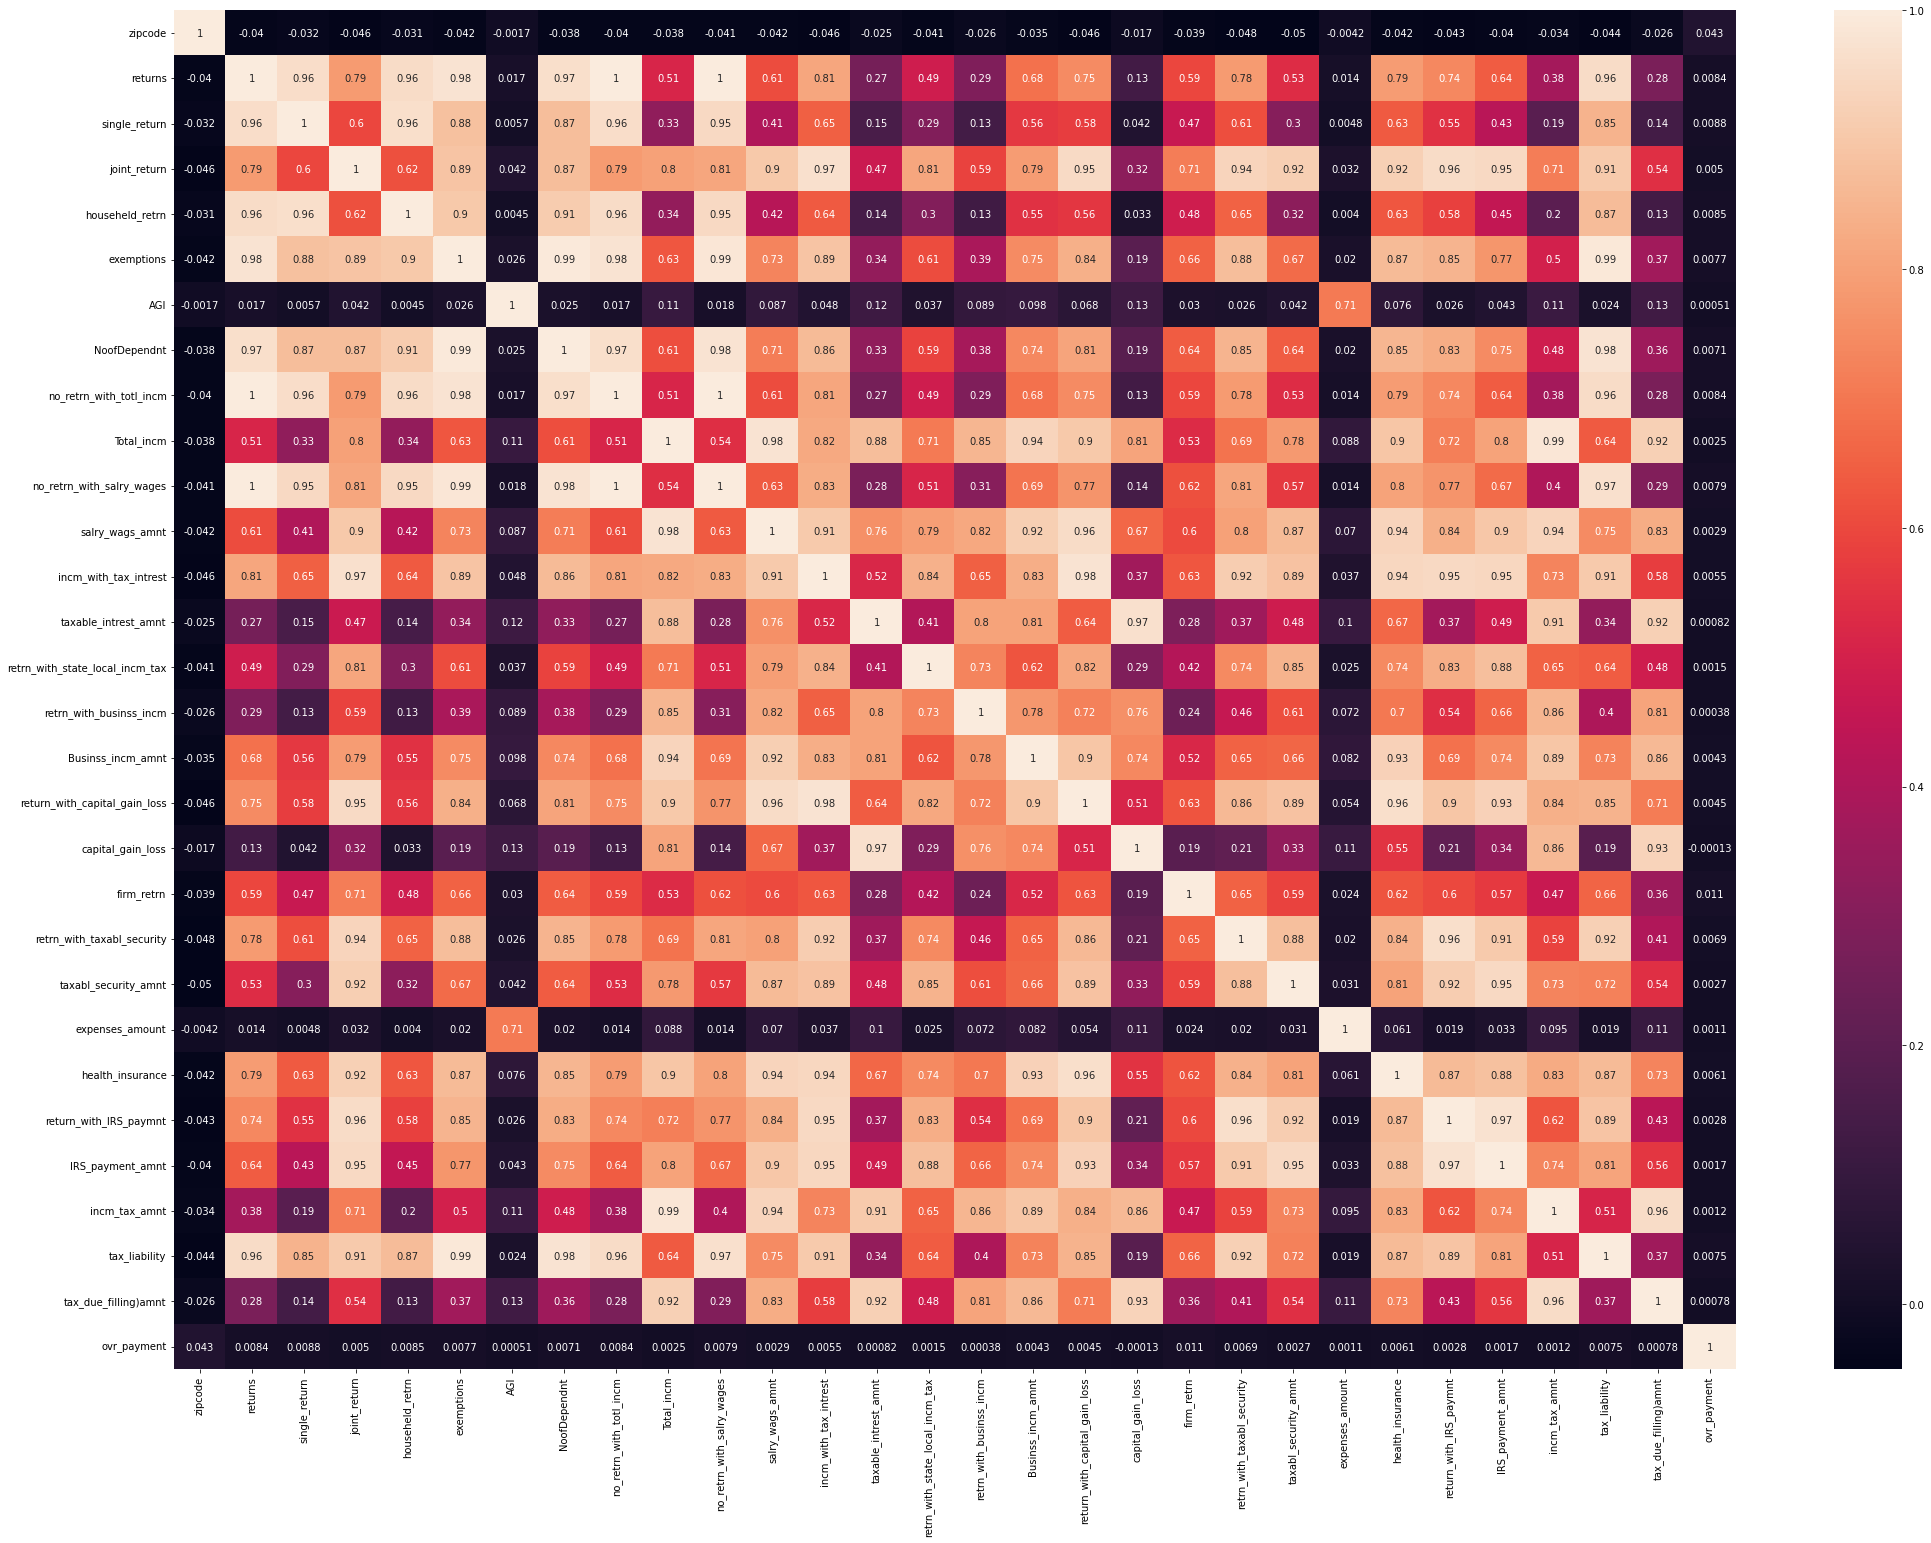

In [ ]:
plt.figure(figsize=(35,25)) 
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166670 entries, 0 to 166669
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   STATEFIPS                        166665 non-null  object 
 1   STATE                            166664 non-null  object 
 2   zipcode                          166661 non-null  float64
 3   agi_stub                         166663 non-null  object 
 4   returns                          166645 non-null  float64
 5   single_return                    166647 non-null  float64
 6   joint_return                     166644 non-null  float64
 7   househeld_retrn                  166637 non-null  float64
 8   exemptions                       166642 non-null  float64
 9   AGI                              166670 non-null  int64  
 10  NoofDependnt                     166643 non-null  float64
 11  no_retrn_with_totl_incm          166642 non-null  float64
 12  To

In [ ]:
df.describe()

,zipcode,returns,single_return,joint_return,househeld_retrn,exemptions,AGI,NoofDependnt,no_retrn_with_totl_incm,Total_incm,...,retrn_with_taxabl_security,taxabl_security_amnt,expenses_amount,health_insurance,return_with_IRS_paymnt,IRS_payment_amnt,incm_tax_amnt,tax_liability,tax_due_filling)amnt,ovr_payment
count,166661.000000,1.666450e+05,1.666470e+05,1.666440e+05,1.666370e+05,1.666420e+05,1.666700e+05,1.666430e+05,1.666420e+05,1.666440e+05,...,166641.000000,1.160810e+05,166669.000000,166636.000000,166646.000000,166645.000000,1.666400e+05,1.666410e+05,1.666420e+05,1.666340e+05
mean,48852.255771,1.728496e+03,8.064674e+02,6.319944e+02,2.569141e+02,3.388641e+03,1.165318e+05,1.136092e+03,1.730080e+03,1.181872e+05,...,224.841468,4.444973e+03,10.625179,45.898185,29.398221,141.633046,8.162930e+04,1.311754e+03,1.792258e+03,1.311866e+03
std,27136.745054,3.668799e+04,2.126898e+04,1.141177e+04,6.895833e+03,6.673563e+04,2.586798e+06,2.358758e+04,3.668939e+04,2.623682e+06,...,4047.747388,7.267096e+04,221.789125,860.359181,584.705642,2946.407855,2.025456e+06,2.508024e+04,5.604961e+04,2.944549e+04
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,1.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,27021.000000,6.000000e+01,0.000000e+00,4.000000e+01,0.000000e+00,1.400000e+02,4.051000e+03,4.000000e+01,6.000000e+01,4.111000e+03,...,0.000000,4.210000e+02,0.000000,0.000000,0.000000,0.000000,2.019000e+03,5.000000e+01,1.700000e+01,4.000000e+01
50%,48867.000000,2.300000e+02,6.000000e+01,1.100000e+02,2.000000e+01,5.000000e+02,1.482000e+04,1.500000e+02,2.300000e+02,1.504950e+04,...,40.000000,9.170000e+02,0.000000,0.000000,0.000000,0.000000,8.441000e+03,1.900000e+02,1.470000e+02,1.600000e+02
75%,70577.000000,9.500000e+02,3.000000e+02,3.900000e+02,8.000000e+01,1.980000e+03,5.792775e+04,5.800000e+02,9.500000e+02,5.878450e+04,...,140.000000,2.771000e+03,8.000000,30.000000,20.000000,102.000000,3.356100e+04,8.000000e+02,6.257500e+02,6.600000e+02
max,99999.000000,6.336730e+06,4.292060e+06,1.611640e+06,1.104160e+06,1.001550e+07,5.278373e+08,3.614920e+06,6.336700e+06,5.360666e+08,...,458080.000000,8.903807e+06,32648.000000,118260.000000,95830.000000,567366.000000,4.310143e+08,3.248700e+06,1.461309e+07,5.071130e+06


# Data Visualization

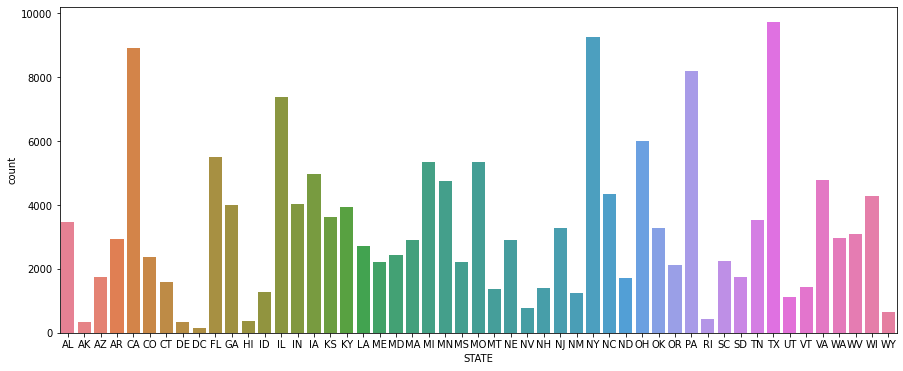

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x='STATE', data=df, palette ='husl')

In [ ]:
#Number of unique values in each columns
for i in range(0, len(df.columns)):
    print(df.columns[i], ":", df.iloc[:,i].nunique())

STATEFIPS : 55
STATE : 51
zipcode : 27685
agi_stub : 13
returns : 1765
single_return : 1241
joint_return : 879
househeld_retrn : 758
exemptions : 2644
AGI : 77045
NoofDependnt : 1517
no_retrn_with_totl_incm : 1771
Total_incm : 77208
no_retrn_with_salry_wages : 1541
salry_wags_amnt : 67608
incm_with_tax_intrest : 790
taxable_intrest_amnt : 5672
retrn_with_state_local_incm_tax : 650
retrn_with_businss_incm : 3944
Businss_incm_amnt : 15041
return_with_capital_gain_loss : 694
capital_gain_loss : 14041
firm_retrn : 275
retrn_with_taxabl_security : 541
taxabl_security_amnt : 12668
expenses_amount : 440
health_insurance : 373
return_with_IRS_paymnt : 307
IRS_payment_amnt : 1666
incm_tax_amnt : 63252
tax_liability : 1264
tax_due_filling)amnt : 9278
ovr_payment : 1553


# Creating Risk Column

In [ ]:
df["Risk"] = df["return_with_capital_gain_loss"] * df["capital_gain_loss"]

In [ ]:
df.head()

,STATEFIPS,STATE,zipcode,agi_stub,returns,single_return,joint_return,househeld_retrn,exemptions,AGI,...,taxabl_security_amnt,expenses_amount,health_insurance,return_with_IRS_paymnt,IRS_payment_amnt,incm_tax_amnt,tax_liability,tax_due_filling)amnt,ovr_payment,Risk
0,1,AL,35000.0,1,350.0,960.0,240.0,NaN,4560.0,680,...,613.0,NaN,NaN,25.0,6523.0,1540.0,682.0,1200.0,0.0,0.0
1,1,AL,35004.0,1,1510.0,750.0,230.0,270.0,2130.0,660,...,2756.0,40.0,20.0,85.0,4003.0,280.0,112.0,1300.0,1230.0,0.0
2,1,AL,35004.0,2,1280.0,590.0,370.0,270.0,2450.0,800,...,2229.0,0.0,0.0,0.0,25244.0,1090.0,255.0,1090.0,910.0,0.0
3,1,AL,35004.0,3,920.0,280.0,510.0,110.0,2070.0,650,...,2312.0,30.0,20.0,50.0,36673.0,890.0,357.0,720.0,360.0,0.0
4,1,AL,35004.0,4,630.0,100.0,490.0,50.0,1650.0,530,...,3343.0,0.0,30.0,116.0,38665.0,630.0,312.0,490.0,180.0,0.0


In [ ]:
df["Risk"] = df["Risk"]/1000000 

In [ ]:
df["Risk"].max()

58297021.9065

In [ ]:
df["Risk"].min()

-1.8054

In [ ]:
df['Risk'].gt(1).sum()

15002

In [ ]:
df.loc[df.Risk >= 1, ['final_risk']] = 1

In [ ]:
df['final_risk'] = df['final_risk'].fillna(0)

In [ ]:
df['Risk'].unique()

array([0.0000000e+00, 2.0960000e-02, 6.0000000e-04, ..., 1.7836200e+00,
       1.6516800e+01, 3.7261483e+02])

In [ ]:
df.head()

,STATEFIPS,STATE,zipcode,agi_stub,returns,single_return,joint_return,househeld_retrn,exemptions,AGI,...,expenses_amount,health_insurance,return_with_IRS_paymnt,IRS_payment_amnt,incm_tax_amnt,tax_liability,tax_due_filling)amnt,ovr_payment,Risk,final_risk
0,1,AL,35000.0,1,350.0,960.0,240.0,NaN,4560.0,680,...,NaN,NaN,25.0,6523.0,1540.0,682.0,1200.0,0.0,0.0,0.0
1,1,AL,35004.0,1,1510.0,750.0,230.0,270.0,2130.0,660,...,40.0,20.0,85.0,4003.0,280.0,112.0,1300.0,1230.0,0.0,0.0
2,1,AL,35004.0,2,1280.0,590.0,370.0,270.0,2450.0,800,...,0.0,0.0,0.0,25244.0,1090.0,255.0,1090.0,910.0,0.0,0.0
3,1,AL,35004.0,3,920.0,280.0,510.0,110.0,2070.0,650,...,30.0,20.0,50.0,36673.0,890.0,357.0,720.0,360.0,0.0,0.0
4,1,AL,35004.0,4,630.0,100.0,490.0,50.0,1650.0,530,...,0.0,30.0,116.0,38665.0,630.0,312.0,490.0,180.0,0.0,0.0


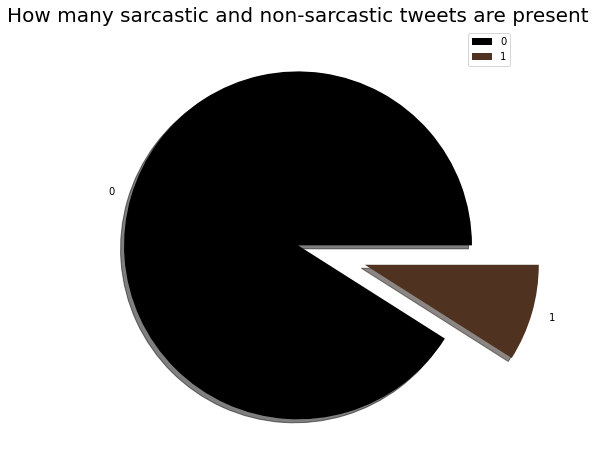

In [ ]:
# plotting a pie chart to represent share of international repuatation

labels = ['0', '1']
sizes = df['final_risk'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0.4]

plt.rcParams['figure.figsize'] = (8,8)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('How many sarcastic and non-sarcastic tweets are present', fontsize = 20)
plt.legend()
plt.show()

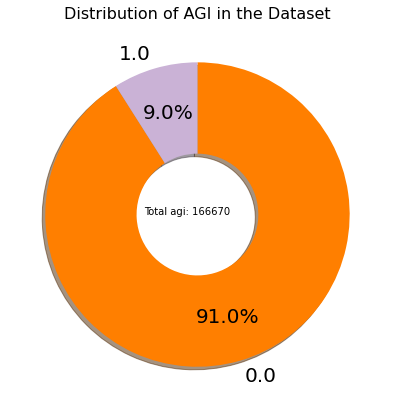

In [ ]:
plt.figure(figsize = (7,7))
sorted_counts = df['final_risk'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 20}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total agi: {}'.format(df.shape[0]))
plt.title('Distribution of AGI in the Dataset', fontsize = 16);

In [ ]:
df1 = df.drop(['STATEFIPS', 'agi_stub', 'STATE','zipcode','joint_return','Risk'], axis=1)

In [ ]:
dff = df1.replace('', np.nan)

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166670 entries, 0 to 166669
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   returns                          166645 non-null  float64
 1   single_return                    166647 non-null  float64
 2   househeld_retrn                  166637 non-null  float64
 3   exemptions                       166642 non-null  float64
 4   AGI                              166670 non-null  int64  
 5   NoofDependnt                     166643 non-null  float64
 6   no_retrn_with_totl_incm          166642 non-null  float64
 7   Total_incm                       166644 non-null  float64
 8   no_retrn_with_salry_wages        166644 non-null  float64
 9   salry_wags_amnt                  166643 non-null  float64
 10  incm_with_tax_intrest            166641 non-null  float64
 11  taxable_intrest_amnt             166639 non-null  float64
 12  re

In [ ]:
# dff.fillna(dff.median(), inplace=True)

In [ ]:
np.any(np.isnan(dff))

True

In [ ]:
#missing data
total = dff.isnull().sum().sort_values(ascending=False)
percent = (dff.isnull().sum()/dff.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
taxabl_security_amnt,50589,0.303528
ovr_payment,36,0.000216
health_insurance,34,0.000204
househeld_retrn,33,0.000198
retrn_with_businss_incm,32,0.000192


In [ ]:
dff.dropna(inplace=True)

In [ ]:
#missing data
total = dff.isnull().sum().sort_values(ascending=False)
percent = (dff.isnull().sum()/dff.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
returns,0,0.0
return_with_capital_gain_loss,0,0.0
ovr_payment,0,0.0
tax_due_filling)amnt,0,0.0
tax_liability,0,0.0


In [ ]:
X=dff.drop(['final_risk'],axis=1)
y=dff['final_risk']

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X,y,test_size=0.3)

In [ ]:
Train_X

,returns,single_return,househeld_retrn,exemptions,AGI,NoofDependnt,no_retrn_with_totl_incm,Total_incm,no_retrn_with_salry_wages,salry_wags_amnt,...,retrn_with_taxabl_security,taxabl_security_amnt,expenses_amount,health_insurance,return_with_IRS_paymnt,IRS_payment_amnt,incm_tax_amnt,tax_liability,tax_due_filling)amnt,ovr_payment
93151,430.0,180.0,60.0,860.0,50311,240.0,430.0,26659.0,390.0,20974.0,...,100.0,1432.0,9.0,0.0,40.0,175.0,17057.0,420.0,126.0,1290.0
70420,440.0,280.0,60.0,630.0,145108,170.0,440.0,5268.0,290.0,3123.0,...,30.0,55.0,15.0,0.0,0.0,0.0,941.0,210.0,27.0,6340.0
103074,220.0,110.0,50.0,420.0,10500,120.0,220.0,8402.0,180.0,6065.0,...,50.0,343.0,7.0,0.0,0.0,0.0,4562.0,200.0,46.0,520.0
144920,430.0,70.0,0.0,1010.0,29043,260.0,430.0,37203.0,350.0,25450.0,...,120.0,2212.0,0.0,0.0,0.0,0.0,26349.0,420.0,350.0,500.0
15910,520.0,290.0,100.0,920.0,11275,300.0,520.0,6969.0,370.0,4696.0,...,30.0,28.0,0.0,0.0,0.0,0.0,1140.0,260.0,59.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118148,110.0,40.0,50.0,250.0,38064,90.0,110.0,4000.0,100.0,3368.0,...,40.0,276.0,0.0,0.0,0.0,0.0,1845.0,90.0,0.0,40.0
150558,220.0,130.0,60.0,370.0,12692,100.0,220.0,8114.0,200.0,6397.0,...,60.0,345.0,0.0,0.0,20.0,116.0,4529.0,200.0,41.0,30.0
113024,1100.0,70.0,0.0,3490.0,33510,1400.0,1100.0,494726.0,1010.0,307340.0,...,140.0,3326.0,0.0,150.0,0.0,0.0,422220.0,1100.0,13303.0,40.0
32629,770.0,200.0,20.0,1750.0,176085,430.0,770.0,66920.0,670.0,49319.0,...,170.0,3313.0,15.0,40.0,30.0,110.0,48157.0,770.0,829.0,730.0


In [ ]:
Test_X

,returns,single_return,househeld_retrn,exemptions,AGI,NoofDependnt,no_retrn_with_totl_incm,Total_incm,no_retrn_with_salry_wages,salry_wags_amnt,...,retrn_with_taxabl_security,taxabl_security_amnt,expenses_amount,health_insurance,return_with_IRS_paymnt,IRS_payment_amnt,incm_tax_amnt,tax_liability,tax_due_filling)amnt,ovr_payment
77734,1220.0,260.0,120.0,3100.0,3855,1050.0,1220.0,75651.0,1070.0,58824.0,...,290.0,4164.0,0.0,40.0,40.0,182.0,46917.0,1180.0,628.0,80.0
47448,70.0,0.0,0.0,160.0,5057,60.0,70.0,4261.0,80.0,4634.0,...,30.0,498.0,0.0,30.0,0.0,0.0,2722.0,70.0,109.0,0.0
41156,1670.0,240.0,70.0,4560.0,371927,1520.0,1670.0,218960.0,1540.0,175694.0,...,290.0,6664.0,8.0,40.0,40.0,245.0,169425.0,1670.0,1776.0,390.0
92438,340.0,110.0,30.0,780.0,31215,250.0,340.0,30524.0,260.0,18025.0,...,100.0,2102.0,0.0,30.0,0.0,0.0,18773.0,330.0,625.0,0.0
105047,1140.0,720.0,200.0,1700.0,85141,560.0,1140.0,14300.0,880.0,10526.0,...,50.0,100.0,19.0,30.0,0.0,0.0,2652.0,560.0,104.0,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155617,230.0,40.0,0.0,580.0,2729,180.0,230.0,14429.0,220.0,12279.0,...,50.0,690.0,0.0,0.0,40.0,123.0,9197.0,220.0,34.0,100.0
90265,200.0,70.0,30.0,410.0,21511,110.0,200.0,12478.0,170.0,9163.0,...,60.0,837.0,0.0,0.0,0.0,0.0,8080.0,200.0,100.0,40.0
12384,640.0,140.0,110.0,2130.0,49483,1090.0,640.0,22764.0,600.0,18248.0,...,50.0,286.0,15.0,0.0,0.0,0.0,7128.0,370.0,194.0,140.0
65773,1440.0,380.0,80.0,3220.0,45225,830.0,1440.0,126481.0,1230.0,90001.0,...,360.0,6786.0,6.0,70.0,50.0,264.0,88877.0,1420.0,1418.0,450.0


# Standar Scalar

StandardScaler removes the mean and scales each feature/variable to unit variance.
StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler does not meet the strict definition of scale I introduced earlier.

In [ ]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
Train_X = sc.fit_transform(Train_X) 
Test_X = sc.fit_transform(Test_X)

# Hard voting classification

In hard voting (also known as majority voting), every individual classifier votes for a class, and the majority wins. In statistical terms, the predicted target label of the ensemble is the mode of the distribution of individually predicted labels.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

lr_hard = LogisticRegression()
lr_hard.fit(Train_X, Train_Y)
knn_hard = KNeighborsClassifier(7)
knn_hard.fit(Train_X, Train_Y)
svc_hard = SVC(C = 10, probability = True)
svc_hard.fit(Train_X, Train_Y)

voting_clf_hard = VotingClassifier(estimators=[('lr', lr_hard), ('knn', knn_hard), ('svc', svc_hard)], voting='hard')
voting_clf_hard.fit(Train_X, Train_Y)

from sklearn.metrics import accuracy_score
for clf in (lr_hard, knn_hard, svc_hard, voting_clf_hard):
    clf.fit(Train_X, Train_Y)
    y_test_pred = clf.predict(Test_X)
    y_train_pred = clf.predict(Train_X)
    print(clf.__class__.__name__, accuracy_score(Test_Y, y_test_pred))

LogisticRegression 0.9736600218302982
KNeighborsClassifier 0.9670247601539611
SVC 0.9788016315275464
VotingClassifier 0.9769632906302063


In [ ]:
Train_X

array([[-0.04539524, -0.03721793, -0.03694779, ..., -0.04684346,
        -0.03327566, -0.01425687],
       [-0.04517448, -0.03335455, -0.03694779, ..., -0.05344762,
        -0.03454829,  0.13802917],
       [-0.05003106, -0.0399223 , -0.03815395, ..., -0.0537621 ,
        -0.03430405, -0.03747672],
       ...,
       [-0.03060477, -0.04146765, -0.04418475, ..., -0.02545857,
         0.13611256, -0.05195143],
       [-0.03788963, -0.03644525, -0.04177243, ..., -0.03583653,
        -0.02423871, -0.03114403],
       [-0.04760277, -0.04108131, -0.04056627, ..., -0.05030278,
        -0.03114176, -0.04984053]])

In [ ]:
Train_Y

93151     0.0
70420     0.0
103074    0.0
144920    0.0
15910     0.0
         ... 
118148    0.0
150558    0.0
113024    1.0
32629     0.0
157747    0.0
Name: final_risk, Length: 81230, dtype: float64

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
def mx_bayes(train_x, train_y):
    mx = GaussianNB()
    mx.fit(Train_X, Train_Y)
    return mx

mx= mx_bayes(Train_X, Train_Y)
nb_pred = mx.predict(Test_X)
nb_accuracy = round(accuracy_score(nb_pred, Test_Y)*100,2)
print("Naive Bayes Accuracy Score ->", nb_accuracy," %")

Naive Bayes Accuracy Score -> 51.47  %


# SVM

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(Train_X, Train_Y)

#Predict the response for test dataset
y_pred = clf.predict(Test_X)
svm_accuracy = round(accuracy_score(y_pred, Test_Y)*100,2)
print("SVM Accuracy Score ->", svm_accuracy," %")

SVM Accuracy Score -> 97.99  %


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Create Decision Tree classifer object
dect = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
dect.fit(Train_X,Train_Y)

#Predict the response for test dataset
y_predc = dect.predict(Test_X)
dct_accuracy = round(accuracy_score(y_predc, Test_Y)*100,2)
print("Decision Tree Accuracy Score ->", dct_accuracy," %")

Decision Tree Accuracy Score -> 95.32  %


# Random Forest 

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(Train_X)
X_test = sc.transform(Test_X)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(X_train, Train_Y)
y_predrf = regressor.predict(X_test)
rf_accuracy = round(accuracy_score(y_predrf, Test_Y)*100,2)
print("Random forest Accuracy Score ->", rf_accuracy," %")

Random forest Accuracy Score -> 96.8  %


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Test_Y,y_predrf))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     30236
         1.0       0.98      0.77      0.86      4578

    accuracy                           0.97     34814
   macro avg       0.97      0.88      0.92     34814
weighted avg       0.97      0.97      0.97     34814



# Accuracy Score

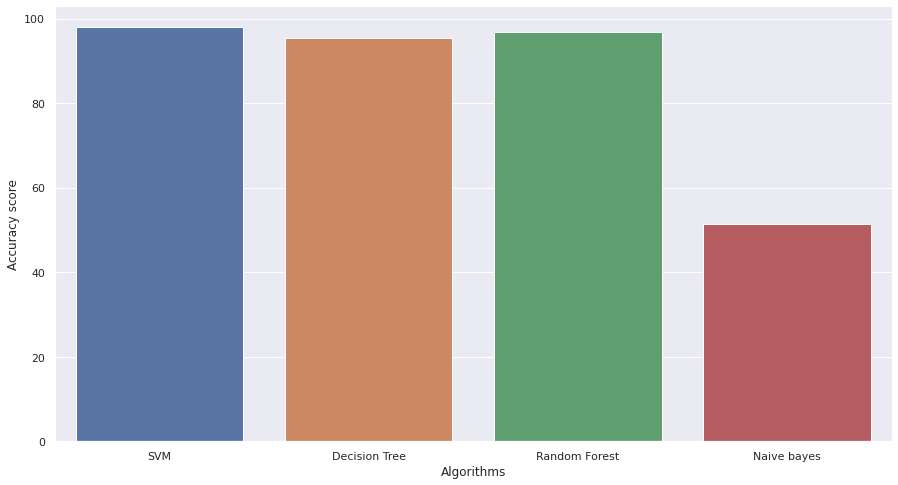

In [ ]:
scores = [svm_accuracy,dct_accuracy,rf_accuracy, nb_accuracy]
algorithms = ["SVM","Decision Tree","Random Forest", "Naive bayes"]    


sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)
plt.show()

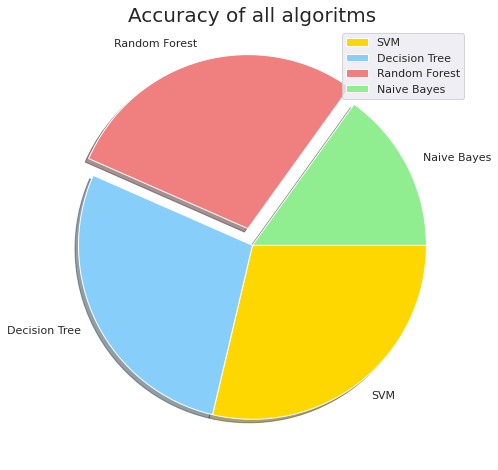

In [ ]:
# plotting a pie chart to represent share of international repuatation

values = [svm_accuracy,dct_accuracy,rf_accuracy, nb_accuracy]
colors = ['gold', 'lightskyblue', 'lightcoral', 'lightgreen']
labels = ['SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes']
explode = [0, 0, 0.1, 0]

plt.rcParams['figure.figsize'] = (8,8)
plt.pie(values, colors=colors, labels= labels,explode=explode,counterclock=False, shadow=True)
plt.title('Accuracy of all algoritms', fontsize = 20)
plt.legend()
plt.show()

# SVM pickle

In [ ]:
import pickle

with open('/content/svm_pickle', 'wb') as f:
    pickle.dump(clf,f)
    
if __name__=='__main__':
    with open('/content/svm_pickle', 'rb') as f:
        clf_users = pickle.load(f)
        
sv = clf_users.predict(Train_X)

# Decision Tree Classifier pickel

In [ ]:
import pickle

with open('/content/dtc_pickle', 'wb') as f:
    pickle.dump(dect,f)
    
if __name__=='__main__':
    with open('/content/dtc_pickle', 'rb') as f:
        dect_users = pickle.load(f)
        
ranfc = dect_users.predict(Train_X)

# Random Forest Classifier pickel

In [ ]:
import pickle

with open('/content/rf_pickle', 'wb') as f:
    pickle.dump(regressor,f)
    
if __name__=='__main__':
    with open('/content/rf_pickle', 'rb') as f:
        regressor_users = pickle.load(f)
        
ranfc = regressor_users.predict(Train_X)

# Code Testing

In [ ]:
a= float(input("Enter your Return value: ")),
b= float(input("Enter your single value: ")),
c= float(input("Enter your househeld return value: ")),
d= float(input("Enter your exemption value: ")), 
e= float(input("Enter your AGI value: ")), 
f= float(input("Enter no of department value: ")),
g= float(input("Enter your total income with no return value: ")),
h= float(input("Enter your total income value: ")), 
i= float(input("Enter your salary wages with no return value: ")),
j= float(input("Enter your salary wage amount value: ")),
k= float(input("Enter your income with tax interest value: ")),
l= float(input("Enter your taxable interest amount value: ")),
m= float(input("Enter your return with state local income tax value: ")), 
n= float(input("Enter your return with businrss income value: ")),
o= float(input("Enter your business income amount value: ")),
p= float(input("Enter your return with capital gain loss value: ")),
q= float(input("Enter your capital gain loss value: ")),
r= float(input("Enter your firm return value: ")),
s= float(input("Enter your return with taxable security value: ")), 
t= float(input("Enter your taxable security amount value: ")),
u= float(input("Enter your expense amount value: ")), 
v= float(input("Enter your health insurance value: ")), 
w= float(input("Enter your return with IRS payment value: ")),
x= float(input("Enter your IRS payment amount value: ")), 
y= float(input("Enter your income tax amount value: ")), 
z= float(input("Enter your Tax liability value: ")), 
aa= float(input("Enter your tax due filling amount value: ")),
bb= float(input("Enter your over payment value: "))

dt = {'returns': a,
        'single_return': b,
        'househeld_retrn': c,
        'exemptions': d,
        'AGI': e,
        'NoofDependnt': f,
        'no_retrn_with_totl_incm': g,
        'Total_incm': h,
        'no_retrn_with_salry_wages': i,
        'salry_wags_amnt': j,
        'incm_with_tax_intrest': k,
        'taxable_intrest_amnt': l,
        'retrn_with_state_local_incm_tax': m,
        'retrn_with_businss_incm': n,
        'Businss_incm_amnt': o,
        'return_with_capital_gain_loss': p,
        'capital_gain_loss': q,
        'firm_retrn': r,
        'retrn_with_taxabl_security': s,
        'taxabl_security_amnt': t,
        'expenses_amount': u,
        'health_insurance': v,
        'return_with_IRS_paymnt': w,
        'IRS_payment_amnt': x,
        'incm_tax_amnt': y,
        'tax_liability': z,
        'tax_due_filling)amnt': aa,
        'ovr_payment': bb}

dff=pd.DataFrame(dt,index=[0])
dff

In [ ]:
dff.info()

In [ ]:
new_list=[]
filename='/content/svm_pickle'
loaded_model_rf = pickle.load(open(filename, 'rb'))
rf1=loaded_model_rf.predict(dff)
output_svm=rf1[0]
if output_svm==1:
    new_list.append(output_svm)
    print(" According to SVM Classification Risk not Detected")
    
else:
    new_list.append(output_svm)
    print(" According to SVM Classification Risk Detected")
    
filename='/content/rf_pickle'
loaded_model_rf = pickle.load(open(filename, 'rb'))
rf2=loaded_model_rf.predict(dff)
output_rfc=rf2[0]
if output_rfc==1:
    new_list.append(output_rfc)
    print(" According to Random Forest Classification Risk not Detected")
else:
    new_list.append(output_rfc)
    print(" According to Random Forest Classification Risk Detected")
    
filename='/content/dtc_pickle'
loaded_model_rf = pickle.load(open(filename, 'rb'))
rf3=loaded_model_rf.predict(dff)
output_dt=rf3[0]
if output_dt==1:
    new_list.append(output_dt)
    print(" According to Decision Tree Classification Risk not Detected")
else:
    new_list.append(output_dt)
    print(" According to Decision tree Classification Risk Detected")

In [ ]:
a=new_list.count(1)
b=new_list.count(0)

In [ ]:
if a>b:
    rt="Risk is there"  
else:
    nr="Risk is not there"

In [ ]:
# Risk
# df["return_with_capital_gain_loss"] * df["capital_gain_loss"]
if rt=="Risk is there":
    sr = p[0] * q[0]
    rs =sr/1000000 
    #vola
    # df['Log_Ret'] = np.log(df['Risk'] / df['Risk'].shift(1))
    # df['vola'] = df['Log_Ret'].rolling(window=2).std()

    lg_rate = np.log(rs / rs.shift(1))

    vola = lg_rate.rolling(window=2).std()

    if vola >= 3.0:
        print("VOlatile Approach detected")
    else:
        print("VOlatile Approach not detected")
else:
    print("high risk taxpayer not found")

In [ ]:
# Ammendment

In [ ]:
# IRS_payment_amnt

In [ ]:
x=x[0]

In [ ]:
if p =="Risk is there":
    if x >= 10000:
        print("amendment Approach")

In [ ]:
#diagnostic

In [ ]:
#'returns' = a
#'househeld_retrn' = c 
#'Total_incm' = h
#'salry_wags_amnt' = j 
#'capital_gain_loss' = q
#'taxabl_security_amnt' = t 
#'incm_tax_amnt' = y

In [ ]:
#statement

In [ ]:
l=l[0]

In [ ]:
#taxable_intrest_amnt = l 
if p =="Risk is there":
    if l >= 100000:
        print("Statement Approch")
else:
    print("user is not a high risk taxpayers")

In [ ]:
#colorfull

#IRS_payment_amnt = x> 10000
# taxable_intrest_amnt = l> 10000

In [ ]:
if x > 10000 and l > 10000:
    print("high risk taxpayer")
    
else:
    print("user is not a high risk taxpayers")